# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [4]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta


from keras.utils import np_utils
from sklearn import metrics as me
from tensorflow.keras.backend import clear_session


%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [6]:
def plot_graph(history, optimName, batch_size, n_epoch, n_neurons, drop, testScore, testAccuracy):
    pl.clf()
    pl.plot(history.history['loss'], label='Training')
    pl.plot(history.history['val_loss'], label='Testing')
    pl.ylabel('loss')
    pl.xlabel('Number of epochs')
    pl.suptitle(optimName+' Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)))
    pl.legend()
    pl.title('Test score:' + str(round(testScore,2)) + ', Test accuracy: '  + str(round(testAccuracy,2)))
    pl.grid()
    pl.savefig('../outPut3/' + optimName+'_Batch_size'+str(batch_size)+' Nb_epochs'+str(n_epoch)+' Nb_neurons'+str(n_neurons)+'_Dropout_'+ ('None' if drop < 0 else str(drop))  + '.png', dpi=500)

In [7]:
def test_hypers(neurons, drops, batch_sizes, optims, optimNames, n_epoch):
    for n_neurons in neurons:
        for drop in drops:
            for batch_size in batch_sizes:
                for i_o, optim in enumerate(optims):
                    for e in n_epoch:
                        clear_session()
                        model = Sequential()
                        model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
                        if drop > 0:
                            model.add(Dropout(drop))
                            model.add(Dense(n_classes, activation='softmax'))
                            model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                            history = model.fit(X_train, Y_train,
                                    batch_size=batch_size, epochs=e,
                                    verbose=1, validation_data=(X_test, Y_test))
                            score = model.evaluate(X_test, Y_test, verbose=0)
                            plot_graph(history, optimNames[i_o], batch_size, e, n_neurons, drop, score[0], score[1])
                            print('Test score:', score[0])
                            print('Test accuracy:', score[1])

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.8213 - accuracy: 0.3553 - val_loss: 1.2947 - val_accuracy: 0.6976
Epoch 2/10
938/938 [==============================] - 1s 2ms/step - loss: 1.4704 - accuracy: 0.5103 - val_loss: 1.0484 - val_accuracy: 0.7919
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 1.3595 - accuracy: 0.5446 - val_loss: 0.9464 - val_accuracy: 0.8190
Epoch 4/10
938/938 [==============================] - 1s 2ms/step - loss: 1.3016 - accuracy: 0.5598 - val_loss: 0.8776 - val_accuracy: 0.8328
Epoch 5/10
938/938 [==============================] - 1s 2ms/step - loss: 1.2722 - accuracy: 0.5638 - val_loss: 0.8364 - val_accuracy: 0.8400
Epoch 6/10
938/938 [==============================] - 1s 2ms/step - loss: 1.2453 - accuracy: 0.5721 - val_loss: 0.8021 - val_accuracy: 0.8442
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 1.2289 - accuracy: 0.5757 - val_loss: 0.7775 - val_accuracy: 0.8457
Epoch 

Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2265 - accuracy: 0.5695 - val_loss: 0.7933 - val_accuracy: 0.7974
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2267 - accuracy: 0.5746 - val_loss: 0.7818 - val_accuracy: 0.8052
Epoch 15/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2235 - accuracy: 0.5740 - val_loss: 0.7757 - val_accuracy: 0.8096
Epoch 16/20
469/469 [==============================] - 2s 3ms/step - loss: 1.2180 - accuracy: 0.5788 - val_loss: 0.7761 - val_accuracy: 0.8091
Epoch 17/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2168 - accuracy: 0.5770 - val_loss: 0.7548 - val_accuracy: 0.8187
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2059 - accuracy: 0.5821 - val_loss: 0.7558 - val_accuracy: 0.8183
Epoch 19/20
469/469 [==============================] - 1s 2ms/step - loss: 1.2083 - accuracy: 0.5820 - val_loss: 0.7472 - val_accuracy: 0.8217

Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2901 - accuracy: 0.1255 - val_loss: 2.2769 - val_accuracy: 0.1374
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2854 - accuracy: 0.1295 - val_loss: 2.2719 - val_accuracy: 0.1432
Epoch 11/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2801 - accuracy: 0.1335 - val_loss: 2.2668 - val_accuracy: 0.1493
Epoch 12/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2746 - accuracy: 0.1378 - val_loss: 2.2616 - val_accuracy: 0.1557
Epoch 13/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2705 - accuracy: 0.1397 - val_loss: 2.2562 - val_accuracy: 0.1617
Epoch 14/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2653 - accuracy: 0.1429 - val_loss: 2.2507 - val_accuracy: 0.1675
Epoch 15/20
469/469 [==============================] - 1s 2ms/step - loss: 2.2590 - accuracy: 0.1486 - val_loss: 2.2451 - val_accuracy: 0.1745


Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 2.0008 - accuracy: 0.2559 - val_loss: 1.9159 - val_accuracy: 0.3589
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9669 - accuracy: 0.2697 - val_loss: 1.8761 - val_accuracy: 0.3846
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9352 - accuracy: 0.2850 - val_loss: 1.8419 - val_accuracy: 0.4039
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9125 - accuracy: 0.2941 - val_loss: 1.8114 - val_accuracy: 0.4171
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8890 - accuracy: 0.3084 - val_loss: 1.7839 - val_accuracy: 0.4289
Epoch 10/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8685 - accuracy: 0.3152 - val_loss: 1.7589 - val_accuracy: 0.4361
Epoch 11/20
235/235 [==============================] - 1s 3ms/step - loss: 1.8545 - accuracy: 0.3204 - val_loss: 1.7365 - val_accuracy: 0.4419
Epoc

938/938 [==============================] - 2s 2ms/step - loss: 1.9358 - accuracy: 0.2884 - val_loss: 1.4726 - val_accuracy: 0.6414
Epoch 2/20
938/938 [==============================] - 1s 1ms/step - loss: 1.6994 - accuracy: 0.3766 - val_loss: 1.2541 - val_accuracy: 0.7327
Epoch 3/20
938/938 [==============================] - 1s 1ms/step - loss: 1.6324 - accuracy: 0.4107 - val_loss: 1.1701 - val_accuracy: 0.7762
Epoch 4/20
938/938 [==============================] - 1s 2ms/step - loss: 1.6052 - accuracy: 0.4203 - val_loss: 1.0999 - val_accuracy: 0.7892
Epoch 5/20
938/938 [==============================] - 1s 1ms/step - loss: 1.5829 - accuracy: 0.4230 - val_loss: 1.0522 - val_accuracy: 0.7985
Epoch 6/20
938/938 [==============================] - 1s 1ms/step - loss: 1.5696 - accuracy: 0.4257 - val_loss: 1.0318 - val_accuracy: 0.8018
Epoch 7/20
938/938 [==============================] - 1s 1ms/step - loss: 1.5533 - accuracy: 0.4319 - val_loss: 1.0178 - val_accuracy: 0.8043
Epoch 8/20
938/93

Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 2.1308 - accuracy: 0.1880 - val_loss: 2.0145 - val_accuracy: 0.3536
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 2.0714 - accuracy: 0.2089 - val_loss: 1.9493 - val_accuracy: 0.3983
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 2.0377 - accuracy: 0.2203 - val_loss: 1.9021 - val_accuracy: 0.4288
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 2.0076 - accuracy: 0.2293 - val_loss: 1.8619 - val_accuracy: 0.4564
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9858 - accuracy: 0.2380 - val_loss: 1.8313 - val_accuracy: 0.4779
Epoch 8/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9650 - accuracy: 0.2439 - val_loss: 1.8035 - val_accuracy: 0.4959
Epoch 9/10
469/469 [==============================] - 1s 2ms/step - loss: 1.9493 - accuracy: 0.2489 - val_loss: 1.7780 - val_accuracy: 0.5087
Epoch 

Epoch 15/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9582 - accuracy: 0.2808 - val_loss: 1.8053 - val_accuracy: 0.5300
Epoch 16/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9464 - accuracy: 0.2817 - val_loss: 1.7892 - val_accuracy: 0.5349
Epoch 17/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9367 - accuracy: 0.2858 - val_loss: 1.7749 - val_accuracy: 0.5397
Epoch 18/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9298 - accuracy: 0.2874 - val_loss: 1.7610 - val_accuracy: 0.5431
Epoch 19/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9205 - accuracy: 0.2883 - val_loss: 1.7486 - val_accuracy: 0.5466
Epoch 20/20
235/235 [==============================] - 1s 3ms/step - loss: 1.9158 - accuracy: 0.2881 - val_loss: 1.7363 - val_accuracy: 0.5515
Test score: 1.7362843751907349
Test accuracy: 0.5515000224113464
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 2.3

Epoch 11/20
938/938 [==============================] - 2s 3ms/step - loss: 0.2102 - accuracy: 0.9379 - val_loss: 0.1411 - val_accuracy: 0.9573
Epoch 12/20
938/938 [==============================] - 2s 3ms/step - loss: 0.2033 - accuracy: 0.9397 - val_loss: 0.1372 - val_accuracy: 0.9589
Epoch 13/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1995 - accuracy: 0.9408 - val_loss: 0.1335 - val_accuracy: 0.9601
Epoch 14/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1926 - accuracy: 0.9427 - val_loss: 0.1313 - val_accuracy: 0.9605
Epoch 15/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1905 - accuracy: 0.9439 - val_loss: 0.1284 - val_accuracy: 0.9609
Epoch 16/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1873 - accuracy: 0.9446 - val_loss: 0.1250 - val_accuracy: 0.9616
Epoch 17/20
938/938 [==============================] - 2s 3ms/step - loss: 0.1826 - accuracy: 0.9452 - val_loss: 0.1224 - val_accuracy: 0.9633

Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 2.1515 - accuracy: 0.2175 - val_loss: 2.0989 - val_accuracy: 0.2911
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 2.1100 - accuracy: 0.2544 - val_loss: 2.0556 - val_accuracy: 0.3542
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 2.0671 - accuracy: 0.2939 - val_loss: 2.0118 - val_accuracy: 0.4138
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 2.0266 - accuracy: 0.3313 - val_loss: 1.9676 - val_accuracy: 0.4646
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 1.9845 - accuracy: 0.3650 - val_loss: 1.9230 - val_accuracy: 0.5072
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 1.9435 - accuracy: 0.3988 - val_loss: 1.8779 - val_accuracy: 0.5475
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 1.8995 - accuracy: 0.4317 - val_loss: 1.8326 - val_accuracy: 0.5820
Ep

Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 1.2354 - accuracy: 0.6567 - val_loss: 0.9958 - val_accuracy: 0.8020
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0731 - accuracy: 0.7031 - val_loss: 0.8590 - val_accuracy: 0.8279
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.9717 - accuracy: 0.7299 - val_loss: 0.7672 - val_accuracy: 0.8423
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8986 - accuracy: 0.7480 - val_loss: 0.7022 - val_accuracy: 0.8507
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8462 - accuracy: 0.7623 - val_loss: 0.6540 - val_accuracy: 0.8583
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8027 - accuracy: 0.7739 - val_loss: 0.6157 - val_accuracy: 0.8651
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7622 - accuracy: 0.7832 - val_loss: 0.5848 - val_accuracy: 0.8696
Epoch 

Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 2.3375 - accuracy: 0.1363 - val_loss: 2.2962 - val_accuracy: 0.1631
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 2.3073 - accuracy: 0.1496 - val_loss: 2.2656 - val_accuracy: 0.1821
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 2.2774 - accuracy: 0.1619 - val_loss: 2.2362 - val_accuracy: 0.2002
Epoch 8/10
235/235 [==============================] - 1s 6ms/step - loss: 2.2475 - accuracy: 0.1773 - val_loss: 2.2078 - val_accuracy: 0.2209
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 2.2218 - accuracy: 0.1901 - val_loss: 2.1803 - val_accuracy: 0.2428
Epoch 10/10
235/235 [==============================] - 1s 6ms/step - loss: 2.1941 - accuracy: 0.2093 - val_loss: 2.1535 - val_accuracy: 0.2663
Test score: 2.15347957611084
Test accuracy: 0.2662999927997589
Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 2.3978 - a

938/938 [==============================] - 3s 3ms/step - loss: 1.9106 - accuracy: 0.3457 - val_loss: 1.4499 - val_accuracy: 0.7139
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 1.4338 - accuracy: 0.5634 - val_loss: 1.0778 - val_accuracy: 0.8092
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 1.2088 - accuracy: 0.6393 - val_loss: 0.8861 - val_accuracy: 0.8413
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 1.0793 - accuracy: 0.6787 - val_loss: 0.7736 - val_accuracy: 0.8548
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9973 - accuracy: 0.7048 - val_loss: 0.7001 - val_accuracy: 0.8625
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.9365 - accuracy: 0.7231 - val_loss: 0.6466 - val_accuracy: 0.8691
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.8862 - accuracy: 0.7388 - val_loss: 0.6059 - val_accuracy: 0.8732
Epoch 8/10
938/93

Epoch 13/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8270 - accuracy: 0.7538 - val_loss: 0.5556 - val_accuracy: 0.8740
Epoch 14/20
469/469 [==============================] - 1s 3ms/step - loss: 0.8136 - accuracy: 0.7553 - val_loss: 0.5419 - val_accuracy: 0.8770
Epoch 15/20
469/469 [==============================] - 2s 3ms/step - loss: 0.8016 - accuracy: 0.7591 - val_loss: 0.5299 - val_accuracy: 0.8784
Epoch 16/20
469/469 [==============================] - 2s 3ms/step - loss: 0.7865 - accuracy: 0.7655 - val_loss: 0.5184 - val_accuracy: 0.8806
Epoch 17/20
469/469 [==============================] - 2s 3ms/step - loss: 0.7667 - accuracy: 0.7726 - val_loss: 0.5075 - val_accuracy: 0.8822
Epoch 18/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7589 - accuracy: 0.7735 - val_loss: 0.4982 - val_accuracy: 0.8838
Epoch 19/20
469/469 [==============================] - 1s 3ms/step - loss: 0.7462 - accuracy: 0.7794 - val_loss: 0.4892 - val_accuracy: 0.8855

Epoch 9/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3860 - accuracy: 0.8870 - val_loss: 0.2263 - val_accuracy: 0.9349
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3734 - accuracy: 0.8917 - val_loss: 0.2200 - val_accuracy: 0.9358
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3636 - accuracy: 0.8935 - val_loss: 0.2123 - val_accuracy: 0.9380
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 0.3571 - accuracy: 0.8959 - val_loss: 0.2080 - val_accuracy: 0.9387
Epoch 13/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3492 - accuracy: 0.8967 - val_loss: 0.2038 - val_accuracy: 0.9412
Epoch 14/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3430 - accuracy: 0.8988 - val_loss: 0.1988 - val_accuracy: 0.9422
Epoch 15/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3376 - accuracy: 0.8997 - val_loss: 0.1961 - val_accuracy: 0.9441


Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 2.3195 - accuracy: 0.1431 - val_loss: 2.2427 - val_accuracy: 0.1750
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 2.2934 - accuracy: 0.1520 - val_loss: 2.2194 - val_accuracy: 0.1883
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 2.2667 - accuracy: 0.1590 - val_loss: 2.1974 - val_accuracy: 0.2034
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 2.2468 - accuracy: 0.1680 - val_loss: 2.1763 - val_accuracy: 0.2191
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 2.2257 - accuracy: 0.1785 - val_loss: 2.1559 - val_accuracy: 0.2395
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 2.2017 - accuracy: 0.1900 - val_loss: 2.1361 - val_accuracy: 0.2609
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 2.1820 - accuracy: 0.2010 - val_loss: 2.1170 - val_accuracy: 0.2817
Epoc

938/938 [==============================] - 3s 3ms/step - loss: 1.6587 - accuracy: 0.5180 - val_loss: 1.1144 - val_accuracy: 0.7830
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 1.0210 - accuracy: 0.7363 - val_loss: 0.7629 - val_accuracy: 0.8432
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.8047 - accuracy: 0.7841 - val_loss: 0.6242 - val_accuracy: 0.8681
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.7015 - accuracy: 0.8099 - val_loss: 0.5507 - val_accuracy: 0.8767
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.6421 - accuracy: 0.8239 - val_loss: 0.5046 - val_accuracy: 0.8842
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5979 - accuracy: 0.8349 - val_loss: 0.4719 - val_accuracy: 0.8892
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5675 - accuracy: 0.8416 - val_loss: 0.4478 - val_accuracy: 0.8927
Epoch 8/20
938/93

Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1752 - accuracy: 0.2242 - val_loss: 2.1126 - val_accuracy: 0.3069
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 2.1193 - accuracy: 0.2625 - val_loss: 2.0578 - val_accuracy: 0.3494
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 2.0682 - accuracy: 0.2987 - val_loss: 2.0044 - val_accuracy: 0.3900
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 2.0160 - accuracy: 0.3379 - val_loss: 1.9521 - val_accuracy: 0.4285
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9678 - accuracy: 0.3708 - val_loss: 1.9010 - val_accuracy: 0.4700
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 1.9195 - accuracy: 0.3997 - val_loss: 1.8512 - val_accuracy: 0.5098
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 1.8710 - accuracy: 0.4315 - val_loss: 1.8025 - val_accuracy: 0.5463
Epoch 

Epoch 15/20
235/235 [==============================] - 2s 7ms/step - loss: 1.8352 - accuracy: 0.4303 - val_loss: 1.7784 - val_accuracy: 0.5217
Epoch 16/20
235/235 [==============================] - 2s 7ms/step - loss: 1.8068 - accuracy: 0.4461 - val_loss: 1.7477 - val_accuracy: 0.5458
Epoch 17/20
235/235 [==============================] - 2s 7ms/step - loss: 1.7796 - accuracy: 0.4609 - val_loss: 1.7176 - val_accuracy: 0.5674
Epoch 18/20
235/235 [==============================] - 2s 7ms/step - loss: 1.7509 - accuracy: 0.4819 - val_loss: 1.6882 - val_accuracy: 0.5881
Epoch 19/20
235/235 [==============================] - 2s 7ms/step - loss: 1.7235 - accuracy: 0.4960 - val_loss: 1.6593 - val_accuracy: 0.6048
Epoch 20/20
235/235 [==============================] - 2s 7ms/step - loss: 1.6954 - accuracy: 0.5114 - val_loss: 1.6309 - val_accuracy: 0.6222
Test score: 1.6309082508087158
Test accuracy: 0.6222000122070312
Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.7

Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5854 - accuracy: 0.8299 - val_loss: 0.4140 - val_accuracy: 0.8971
Epoch 12/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5683 - accuracy: 0.8349 - val_loss: 0.4038 - val_accuracy: 0.8996
Epoch 13/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5555 - accuracy: 0.8403 - val_loss: 0.3947 - val_accuracy: 0.9012
Epoch 14/20
938/938 [==============================] - 3s 3ms/step - loss: 0.5461 - accuracy: 0.8430 - val_loss: 0.3867 - val_accuracy: 0.9027
Epoch 15/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5377 - accuracy: 0.8446 - val_loss: 0.3796 - val_accuracy: 0.9042
Epoch 16/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5272 - accuracy: 0.8484 - val_loss: 0.3729 - val_accuracy: 0.9053
Epoch 17/20
938/938 [==============================] - 3s 4ms/step - loss: 0.5169 - accuracy: 0.8506 - val_loss: 0.3670 - val_accuracy: 0.9066

Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2617 - accuracy: 0.9258 - val_loss: 0.1659 - val_accuracy: 0.9523
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2480 - accuracy: 0.9289 - val_loss: 0.1588 - val_accuracy: 0.9535
Epoch 9/20
469/469 [==============================] - 3s 5ms/step - loss: 0.2348 - accuracy: 0.9327 - val_loss: 0.1508 - val_accuracy: 0.9557
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2250 - accuracy: 0.9349 - val_loss: 0.1420 - val_accuracy: 0.9582
Epoch 11/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2190 - accuracy: 0.9371 - val_loss: 0.1382 - val_accuracy: 0.9601
Epoch 12/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2098 - accuracy: 0.9400 - val_loss: 0.1330 - val_accuracy: 0.9609
Epoch 13/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2053 - accuracy: 0.9406 - val_loss: 0.1288 - val_accuracy: 0.9613
Ep

Epoch 3/20
469/469 [==============================] - 3s 5ms/step - loss: 2.2798 - accuracy: 0.1533 - val_loss: 2.1979 - val_accuracy: 0.2039
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 2.2338 - accuracy: 0.1746 - val_loss: 2.1522 - val_accuracy: 0.2449
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 2.1922 - accuracy: 0.1983 - val_loss: 2.1080 - val_accuracy: 0.2878
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1485 - accuracy: 0.2254 - val_loss: 2.0649 - val_accuracy: 0.3360
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 2.1073 - accuracy: 0.2516 - val_loss: 2.0227 - val_accuracy: 0.3811
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0686 - accuracy: 0.2781 - val_loss: 1.9813 - val_accuracy: 0.4281
Epoch 9/20
469/469 [==============================] - 2s 5ms/step - loss: 2.0295 - accuracy: 0.3056 - val_loss: 1.9407 - val_accuracy: 0.4695
Epoch 

Epoch 5/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1229 - accuracy: 0.9654 - val_loss: 0.1032 - val_accuracy: 0.9694
Epoch 6/10
938/938 [==============================] - 5s 6ms/step - loss: 0.1098 - accuracy: 0.9692 - val_loss: 0.0947 - val_accuracy: 0.9723
Epoch 7/10
938/938 [==============================] - 5s 5ms/step - loss: 0.0992 - accuracy: 0.9720 - val_loss: 0.0889 - val_accuracy: 0.9734
Epoch 8/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0878 - accuracy: 0.9752 - val_loss: 0.0832 - val_accuracy: 0.9759
Epoch 9/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0832 - accuracy: 0.9768 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 10/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0766 - accuracy: 0.9780 - val_loss: 0.0769 - val_accuracy: 0.9774
Test score: 0.07692518830299377
Test accuracy: 0.977400004863739
Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4274 -

938/938 [==============================] - 5s 5ms/step - loss: 2.3301 - accuracy: 0.1357 - val_loss: 2.2100 - val_accuracy: 0.2002
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 2.1622 - accuracy: 0.2141 - val_loss: 2.0499 - val_accuracy: 0.3468
Epoch 3/10
938/938 [==============================] - 4s 5ms/step - loss: 2.0107 - accuracy: 0.3343 - val_loss: 1.9042 - val_accuracy: 0.5016
Epoch 4/10
938/938 [==============================] - 5s 5ms/step - loss: 1.8750 - accuracy: 0.4521 - val_loss: 1.7702 - val_accuracy: 0.6178
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 1.7496 - accuracy: 0.5407 - val_loss: 1.6463 - val_accuracy: 0.6833
Epoch 6/10
938/938 [==============================] - 5s 5ms/step - loss: 1.6352 - accuracy: 0.6053 - val_loss: 1.5318 - val_accuracy: 0.7240
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 1.5300 - accuracy: 0.6492 - val_loss: 1.4272 - val_accuracy: 0.7514
Epoch 8/10
938/

Epoch 13/20
469/469 [==============================] - 4s 8ms/step - loss: 1.3745 - accuracy: 0.6982 - val_loss: 1.2882 - val_accuracy: 0.7736
Epoch 14/20
469/469 [==============================] - 4s 8ms/step - loss: 1.3204 - accuracy: 0.7099 - val_loss: 1.2345 - val_accuracy: 0.7828
Epoch 15/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2706 - accuracy: 0.7216 - val_loss: 1.1842 - val_accuracy: 0.7925
Epoch 16/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2244 - accuracy: 0.7309 - val_loss: 1.1371 - val_accuracy: 0.8001
Epoch 17/20
469/469 [==============================] - 3s 7ms/step - loss: 1.1825 - accuracy: 0.7403 - val_loss: 1.0932 - val_accuracy: 0.8070
Epoch 18/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1380 - accuracy: 0.7504 - val_loss: 1.0522 - val_accuracy: 0.8143
Epoch 19/20
469/469 [==============================] - 4s 8ms/step - loss: 1.1001 - accuracy: 0.7588 - val_loss: 1.0139 - val_accuracy: 0.8209

Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1782 - accuracy: 0.9487 - val_loss: 0.1304 - val_accuracy: 0.9607
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1565 - accuracy: 0.9549 - val_loss: 0.1199 - val_accuracy: 0.9644
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1449 - accuracy: 0.9582 - val_loss: 0.1108 - val_accuracy: 0.9680
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1337 - accuracy: 0.9611 - val_loss: 0.1022 - val_accuracy: 0.9696
Epoch 8/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1233 - accuracy: 0.9643 - val_loss: 0.0948 - val_accuracy: 0.9713
Epoch 9/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1157 - accuracy: 0.9667 - val_loss: 0.0911 - val_accuracy: 0.9740
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1078 - accuracy: 0.9694 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch

Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6787 - accuracy: 0.8129 - val_loss: 0.5313 - val_accuracy: 0.8772
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6394 - accuracy: 0.8220 - val_loss: 0.4974 - val_accuracy: 0.8846
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.6070 - accuracy: 0.8308 - val_loss: 0.4715 - val_accuracy: 0.8883
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5819 - accuracy: 0.8364 - val_loss: 0.4502 - val_accuracy: 0.8925
Epoch 10/10
469/469 [==============================] - 3s 7ms/step - loss: 0.5561 - accuracy: 0.8442 - val_loss: 0.4327 - val_accuracy: 0.8948
Test score: 0.43268832564353943
Test accuracy: 0.8948000073432922
Epoch 1/20
469/469 [==============================] - 3s 7ms/step - loss: 1.8188 - accuracy: 0.4321 - val_loss: 1.3111 - val_accuracy: 0.7614
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 1.2071 

235/235 [==============================] - 2s 9ms/step - loss: 0.5724 - accuracy: 0.8401 - val_loss: 0.4561 - val_accuracy: 0.8858
Epoch 18/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5627 - accuracy: 0.8414 - val_loss: 0.4462 - val_accuracy: 0.8878
Epoch 19/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5515 - accuracy: 0.8436 - val_loss: 0.4374 - val_accuracy: 0.8895
Epoch 20/20
235/235 [==============================] - 2s 9ms/step - loss: 0.5428 - accuracy: 0.8461 - val_loss: 0.4293 - val_accuracy: 0.8914
Test score: 0.42933452129364014
Test accuracy: 0.8913999795913696
Epoch 1/10
235/235 [==============================] - 3s 10ms/step - loss: 2.3622 - accuracy: 0.1213 - val_loss: 2.2632 - val_accuracy: 0.1567
Epoch 2/10
235/235 [==============================] - 2s 9ms/step - loss: 2.3025 - accuracy: 0.1432 - val_loss: 2.2053 - val_accuracy: 0.2048
Epoch 3/10
235/235 [==============================] - 2s 9ms/step - loss: 2.2485 - accura

Epoch 13/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0460 - accuracy: 0.9867 - val_loss: 0.0600 - val_accuracy: 0.9807
Epoch 14/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0422 - accuracy: 0.9881 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 15/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.0584 - val_accuracy: 0.9818
Epoch 16/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0562 - val_accuracy: 0.9833
Epoch 17/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0346 - accuracy: 0.9902 - val_loss: 0.0554 - val_accuracy: 0.9826
Epoch 18/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0330 - accuracy: 0.9913 - val_loss: 0.0555 - val_accuracy: 0.9822
Epoch 19/20
938/938 [==============================] - 7s 7ms/step - loss: 0.0308 - accuracy: 0.9916 - val_loss: 0.0545 - val_accuracy: 0.9831

Epoch 9/20
938/938 [==============================] - 7s 7ms/step - loss: 1.1658 - accuracy: 0.7556 - val_loss: 1.0666 - val_accuracy: 0.8149
Epoch 10/20
938/938 [==============================] - 6s 7ms/step - loss: 1.0863 - accuracy: 0.7698 - val_loss: 0.9931 - val_accuracy: 0.8234
Epoch 11/20
938/938 [==============================] - 6s 7ms/step - loss: 1.0193 - accuracy: 0.7837 - val_loss: 0.9293 - val_accuracy: 0.8317
Epoch 12/20
938/938 [==============================] - 6s 7ms/step - loss: 0.9628 - accuracy: 0.7920 - val_loss: 0.8738 - val_accuracy: 0.8404
Epoch 13/20
938/938 [==============================] - 6s 7ms/step - loss: 0.9120 - accuracy: 0.7995 - val_loss: 0.8255 - val_accuracy: 0.8466
Epoch 14/20
938/938 [==============================] - 6s 7ms/step - loss: 0.8660 - accuracy: 0.8087 - val_loss: 0.7833 - val_accuracy: 0.8497
Epoch 15/20
938/938 [==============================] - 6s 7ms/step - loss: 0.8266 - accuracy: 0.8128 - val_loss: 0.7463 - val_accuracy: 0.8540


235/235 [==============================] - 3s 11ms/step - loss: 0.0826 - accuracy: 0.9764 - val_loss: 0.0829 - val_accuracy: 0.9755
Test score: 0.0828690230846405
Test accuracy: 0.9754999876022339
Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.5451 - accuracy: 0.8484 - val_loss: 0.2681 - val_accuracy: 0.9256
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2652 - accuracy: 0.9258 - val_loss: 0.2055 - val_accuracy: 0.9420
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2089 - accuracy: 0.9419 - val_loss: 0.1676 - val_accuracy: 0.9517
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1729 - accuracy: 0.9520 - val_loss: 0.1451 - val_accuracy: 0.9578
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1496 - accuracy: 0.9579 - val_loss: 0.1270 - val_accuracy: 0.9635
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.1304 - accu

938/938 [==============================] - 6s 7ms/step - loss: 1.4817 - accuracy: 0.5853 - val_loss: 0.8931 - val_accuracy: 0.8279
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.8363 - accuracy: 0.7840 - val_loss: 0.6173 - val_accuracy: 0.8627
Epoch 3/10
938/938 [==============================] - 6s 7ms/step - loss: 0.6637 - accuracy: 0.8207 - val_loss: 0.5139 - val_accuracy: 0.8749
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5827 - accuracy: 0.8389 - val_loss: 0.4577 - val_accuracy: 0.8856
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.5308 - accuracy: 0.8523 - val_loss: 0.4225 - val_accuracy: 0.8937
Epoch 6/10
938/938 [==============================] - 9s 9ms/step - loss: 0.4983 - accuracy: 0.8597 - val_loss: 0.3970 - val_accuracy: 0.8976
Epoch 7/10
938/938 [==============================] - 6s 6ms/step - loss: 0.4722 - accuracy: 0.8669 - val_loss: 0.3776 - val_accuracy: 0.9022
Epoch 8/10
938/93

Epoch 13/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4653 - accuracy: 0.8694 - val_loss: 0.3776 - val_accuracy: 0.9019
Epoch 14/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4540 - accuracy: 0.8721 - val_loss: 0.3684 - val_accuracy: 0.9048
Epoch 15/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4449 - accuracy: 0.8745 - val_loss: 0.3604 - val_accuracy: 0.9062
Epoch 16/20
469/469 [==============================] - 4s 9ms/step - loss: 0.4367 - accuracy: 0.8766 - val_loss: 0.3533 - val_accuracy: 0.9071
Epoch 17/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4266 - accuracy: 0.8803 - val_loss: 0.3467 - val_accuracy: 0.9089
Epoch 18/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4184 - accuracy: 0.8813 - val_loss: 0.3406 - val_accuracy: 0.9103
Epoch 19/20
469/469 [==============================] - 4s 8ms/step - loss: 0.4120 - accuracy: 0.8838 - val_loss: 0.3353 - val_accuracy: 0.9111

235/235 [==============================] - 3s 11ms/step - loss: 2.2361 - accuracy: 0.1565 - val_loss: 2.1409 - val_accuracy: 0.2175
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 2.1636 - accuracy: 0.1996 - val_loss: 2.0717 - val_accuracy: 0.3109
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 2.0938 - accuracy: 0.2509 - val_loss: 2.0052 - val_accuracy: 0.4213
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 2.0309 - accuracy: 0.3045 - val_loss: 1.9412 - val_accuracy: 0.5089
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 1.9724 - accuracy: 0.3548 - val_loss: 1.8797 - val_accuracy: 0.5713
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 1.9121 - accuracy: 0.4090 - val_loss: 1.8206 - val_accuracy: 0.6157
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 1.8556 - accuracy: 0.4523 - val_loss: 1.7636 - val_accuracy: 0.6483
Epoch 10/2

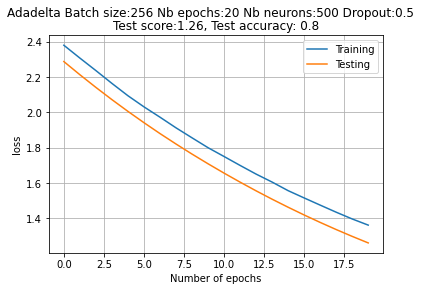

In [114]:
test_hypers([5, 50, 100, 300, 500], [-1, 0.3, 0.5], [64, 128, 256], [Adamax(), Adagrad(), Adadelta()], ['Adamax', 'Adagrad', 'Adadelta'], [10,20])

784 entrées 10 sortie et 300 neurones dans la couche cachée.

In [8]:
n_neurons = 300
drop = -1
model = Sequential()
model.add(Dense(n_neurons, input_shape=(784,), activation='relu'))
if drop > 0:
    model.add(Dropout(drop))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [73]:
'''
 #copy for test 
batch_size = 10, 30, 50, 70, 90,110, 128
n_epoch = 5, 10, 15,20,25,30,35

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

for i in batch_size:
    for j in n_epoch:
        history = model.fit(X_train, Y_train,
                    batch_size=i, epochs=j,
                    verbose=1, validation_data=(X_test, Y_test))
'''

"\n #copy for test \nbatch_size = 10, 30, 50, 70, 90,110, 128\nn_epoch = 5, 10, 15,20,25,30,35\n\nmodel.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])\n\nfor i in batch_size:\n    for j in n_epoch:\n        history = model.fit(X_train, Y_train,\n                    batch_size=i, epochs=j,\n                    verbose=1, validation_data=(X_test, Y_test))\n"

In [9]:
batch_size = 128
n_epoch = 2

model.compile(loss='categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))


Epoch 1/2
469/469 [==============================] - 2s 4ms/step - loss: 2.2764 - accuracy: 0.1167 - val_loss: 2.2136 - val_accuracy: 0.1599
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 2.1583 - accuracy: 0.2102 - val_loss: 2.0962 - val_accuracy: 0.2757


Show the performance of the model

In [1]:

pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.ylabel('loss')
pl.xlabel('Number of epochs')
pl.title('Batch size:'+str(batch_size)+' Nb epochs:'+str(n_epoch)+' Nb neurons:'+str(n_neurons)+' Dropout:'+ ('None' if drop < 0 else str(drop)) )
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


NameError: name 'pl' is not defined

Confusion matrix

In [10]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[567,   1,   1,  25,   4,  87,  20,  26,   4, 245],
       [280, 187,  21,  18,   1,  53, 217,   2, 346,  10],
       [314,   7,  60, 200,  27,  30,  52,  40, 115, 187],
       [ 66,  37,   4, 564,  10,  59, 135,  44,  31,  60],
       [ 78,   1,   3, 152,  94,  37,  12,  25,  86, 494],
       [211,   7,   3, 158,  25, 211,  59,  47,  39, 132],
       [267,   2,   3,  58, 145,  54, 172,  51,  46, 160],
       [ 87,   3,   0,  26,  24, 159,  11, 243, 134, 341],
       [260,   6,  12, 120,   8,  52,  47,  26, 387,  56],
       [120,   1,   0, 125, 102,  40,  14,  84, 251, 272]], dtype=int64)

In [ ]:
# view of the incorrect results
for x in range(500):
    X_tested = X_test[x,:].reshape(1,784)
    pred = model.predict(X_tested).argmax()
    real = Y_test[x].argmax()
    if (pred != real):
        pl.title('Prediction: %d real: %d' % (pred, real))
        pl.imshow(X_tested.reshape([28,28]), cmap=pl.get_cmap('Greys'))
        pl.show()